# Data Processing

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import glob
from copy import deepcopy
import json

In [63]:

filenames = glob.glob('data/machine/**/*.npy', recursive=True)
print(len(filenames))

7795


In [40]:
char = deepcopy(filenames[0][-7])
print(char)




In [61]:
# replace the filenames if they've got a weird character in (only on linux)
char = filenames[0][-7]
new_filenames = []
for filename in glob.glob('data/machine/missing/*.npy'):
    if char != ':':
        new_filename = filename.replace(char, ':')
        os.rename(filename, new_filename)

In [64]:
# we use a set to find the timestamps to remove any duplicate timestamps we have
timestamps = set([filename[-29:-4] for filename in glob.glob('data/machine/**/*.npy', recursive=True)])
len(timestamps)

3665

For each timestamp, we need to read both the input (`values_*`) file and the output (`img_*`) file and load it into a dataframe, setting the timestamp as the index. 

In [68]:
time_series = []
input_errors = []
output_errors = []

for timestamp in timestamps:
    data = {'timestamp': timestamp}
    try:
        input_data = dict(enumerate(np.load(f'data/machine/values_{timestamp}.npy', allow_pickle=True).flatten()))[0]
    except FileNotFoundError:
        try:
            input_data = dict(enumerate(np.load(f'data/machine/missing/values_{timestamp}.npy', allow_pickle=True).flatten()))[0]
        except FileNotFoundError:
            input_data = {}
            input_errors.append(timestamp)
    try:
        output_data = dict(enumerate(np.load(f'data/machine/imgs_{timestamp}.npy', allow_pickle=True).flatten()))[0]
    except FileNotFoundError:
        try:
            output_data = dict(enumerate(np.load(f'data/machine/missing/imgs_{timestamp}.npy', allow_pickle=True).flatten()))[0]
        except FileNotFoundError:
            output_data = {}
            output_errors.append(timestamp)
    data.update(input_data)
    data.update(output_data)
    time_series.append(data)
    
    
time_series = pd.DataFrame(time_series)
time_series['timestamp'] = pd.to_datetime(time_series['timestamp'])
# time_series = time_series.set_index('timestamp')
print(time_series[['timestamp', 'SOLN:IN20:121:BACT', 'QUAD:IN20:121:BACT']].head())
time_series = time_series.sort_values('timestamp').reset_index()
print(time_series[['timestamp', 'SOLN:IN20:121:BACT', 'QUAD:IN20:121:BACT']].head())
time_series = time_series.dropna(axis=1,how='all')

                  timestamp  SOLN:IN20:121:BACT  QUAD:IN20:121:BACT
0 2022-09-23 20:01:28-07:00            0.480001            0.014996
1 2022-09-23 22:10:32-07:00            0.472157            0.006713
2 2022-09-23 15:47:02-07:00            0.476001            0.014395
3 2022-09-23 21:42:22-07:00            0.472668            0.004377
4 2022-09-23 22:51:14-07:00            0.473830            0.014895
                  timestamp  SOLN:IN20:121:BACT  QUAD:IN20:121:BACT
0 2022-09-23 12:18:58-07:00            0.476001           -0.001497
1 2022-09-23 12:19:04-07:00            0.476002           -0.001497
2 2022-09-23 12:19:10-07:00            0.476001           -0.001497
3 2022-09-23 12:19:16-07:00            0.476001            0.003017
4 2022-09-23 12:19:22-07:00            0.476001            0.012042


In [69]:
print(len(output_errors))
print(len(input_errors))

1
14


In [70]:
input_errors

['2022-09-23T15:43:36-07:00',
 '2022-09-23T15:43:15-07:00',
 '2022-09-23T15:45:07-07:00',
 '2022-09-23T15:44:18-07:00',
 '2022-09-23T22:22:01-07:00',
 '2022-09-23T13:16:50-07:00',
 '2022-09-23T15:43:25-07:00',
 '2022-09-23T21:44:23-07:00',
 '2022-09-23T15:44:39-07:00',
 '2022-09-23T15:43:46-07:00',
 '2022-09-23T15:43:57-07:00',
 '2022-09-23T15:44:07-07:00',
 '2022-09-23T19:19:15-07:00',
 '2022-09-23T15:44:28-07:00']

In [71]:
time_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 56 columns):
 #   Column                       Non-Null Count  Dtype                                 
---  ------                       --------------  -----                                 
 0   index                        3665 non-null   int64                                 
 1   timestamp                    3665 non-null   datetime64[ns, pytz.FixedOffset(-420)]
 2   SOLN:IN20:121:BACT           3651 non-null   float64                               
 3   QUAD:IN20:121:BACT           3651 non-null   float64                               
 4   QUAD:IN20:122:BACT           3651 non-null   float64                               
 5   QUAD:IN20:361:BACT           3651 non-null   float64                               
 6   QUAD:IN20:371:BACT           3651 non-null   float64                               
 7   QUAD:IN20:425:BACT           3651 non-null   float64                               
 8 

In [72]:
time_series.describe()

,index,SOLN:IN20:121:BACT,QUAD:IN20:121:BACT,QUAD:IN20:122:BACT,QUAD:IN20:361:BACT,QUAD:IN20:371:BACT,QUAD:IN20:425:BACT,QUAD:IN20:441:BACT,QUAD:IN20:511:BACT,QUAD:IN20:525:BACT,...,FBCK:BCI0:1:CHRG_S,PMTR:LR20:121:PWR,BPMS:IN20:731:X,OTRS:IN20:621:XRMS,OTRS:IN20:621:YRMS,OTRS:IN20:621:ROI_XNP,OTRS:IN20:621:ROI_YNP,OTRS:IN20:621:X,OTRS:IN20:621:Y,OTRS:IN20:621:RESOLUTION
count,3665.000000,3651.000000,3651.000000,3651.000000,3651.000000,3651.000000,3651.000000,3651.000000,3651.000000,3651.000000,...,3421.000000,3421.000000,1801.000000,3650.000000,3650.000000,3650.0,3650.0,3650.000000,3650.000000,3.650000e+03
mean,1832.000000,0.477105,0.007413,0.007138,-3.342899,2.640550,-2.200071,-0.016331,2.815144,-2.593148,...,0.250005,124.846694,-0.002666,114.239708,116.127605,182.0,126.0,-0.462078,-0.640653,1.208000e+01
std,1058.138696,0.003511,0.006331,0.005368,0.287685,0.116054,0.228051,0.015732,0.120757,0.399389,...,0.002165,4.789885,0.075031,104.856292,110.712280,0.0,0.0,0.190288,0.135260,1.073067e-12
min,0.000000,0.460001,-0.014986,-0.014913,-7.164215,1.999732,-3.351267,-0.178492,1.499530,-4.997957,...,0.238080,7.163025,-0.576889,-9.145272,-51.942311,182.0,126.0,-1.594604,-1.551024,1.208000e+01
25%,916.000000,0.475748,0.004376,0.006700,-3.388809,2.560667,-2.261243,-0.015412,2.831612,-2.735006,...,0.248480,122.076233,-0.044943,42.244696,70.728793,182.0,126.0,-0.526240,-0.751225,1.208000e+01
50%,1832.000000,0.476405,0.006430,0.006700,-3.351667,2.634858,-2.258134,-0.015231,2.832221,-2.703317,...,0.249944,124.971924,-0.003185,88.238884,86.945803,182.0,126.0,-0.484220,-0.605212,1.208000e+01
75%,2748.000000,0.480001,0.014395,0.011784,-3.255379,2.721169,-2.173087,-0.014250,2.847732,-2.602223,...,0.251511,127.715210,0.039728,135.610274,125.896304,182.0,126.0,-0.379166,-0.559503,1.208000e+01
max,3664.000000,0.485003,0.014997,0.014925,-1.998420,3.568254,-0.200241,-0.010740,3.122876,-0.499032,...,0.257335,138.688354,0.639313,1548.547770,1687.887286,182.0,126.0,0.964859,-0.072478,1.208000e+01


In [73]:
# save the full time series
start_time = str(time_series['timestamp'].iloc[0]).replace(' ', '_')
end_time = str(time_series['timestamp'].iloc[-1]).replace(' ', '_')
time_series.to_pickle(f'data/full_{start_time}__{end_time}.pkl')

## Filter Data
Now that we have our data loaded, we need to take the subset of the data that we use with our model. Some of the names in the PV info file are wrong (?) so we replace the names with the correct ones. 

In [74]:
with open('configs/pv_info.json', 'r') as f:
    pv_info = json.load(f)
    f.close()
    
input_pvs = [pv_name.replace('BDES', 'BCTRL') for pv_name in pv_info['pv_name_to_sim_name'].keys() if pv_name.replace('BDES', 'BCTRL') in time_series.columns]
output_pvs = ['OTRS:IN20:621:XRMS','OTRS:IN20:621:YRMS']
time_series_subset = time_series[['timestamp'] + input_pvs + output_pvs]
time_series_subset.head()

,timestamp,IRIS:LR20:130:CONFG_SEL,SOLN:IN20:121:BCTRL,QUAD:IN20:121:BCTRL,QUAD:IN20:122:BCTRL,ACCL:IN20:300:L0A_PDES,ACCL:IN20:400:L0B_PDES,ACCL:IN20:300:L0A_ADES,ACCL:IN20:400:L0B_ADES,QUAD:IN20:361:BCTRL,QUAD:IN20:371:BCTRL,QUAD:IN20:425:BCTRL,QUAD:IN20:441:BCTRL,QUAD:IN20:511:BCTRL,QUAD:IN20:525:BCTRL,OTRS:IN20:621:XRMS,OTRS:IN20:621:YRMS
0,2022-09-23 12:18:58-07:00,4.0,0.476,-0.001499,-0.000687,0.0,-2.5,58.0,67.640429,-2.000592,2.000592,-0.202176,-0.179388,2.852172,-3.2184,299.506088,178.293729
1,2022-09-23 12:19:04-07:00,4.0,0.476,-0.001499,-0.000687,0.0,-2.5,58.0,67.633534,-2.000592,2.000592,-0.202176,-0.179388,2.852172,-3.2184,66.474220,8.217163
2,2022-09-23 12:19:10-07:00,4.0,0.476,-0.001499,-0.000687,0.0,-2.5,58.0,67.627709,-2.000592,2.000592,-0.202176,-0.179388,2.852172,-3.2184,5.716895,4.833202
3,2022-09-23 12:19:16-07:00,4.0,0.476,-0.001499,-0.000687,0.0,-2.5,58.0,67.625590,-2.000592,2.000592,-0.202176,-0.179388,2.852172,-3.2184,108.526176,33.254877
4,2022-09-23 12:19:22-07:00,4.0,0.476,-0.001499,-0.000687,0.0,-2.5,58.0,67.617086,-2.000592,2.000592,-0.202176,-0.179388,2.852172,-3.2184,42.353660,253.140019


In [75]:
time_series_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype                                 
---  ------                   --------------  -----                                 
 0   timestamp                3665 non-null   datetime64[ns, pytz.FixedOffset(-420)]
 1   IRIS:LR20:130:CONFG_SEL  3651 non-null   float64                               
 2   SOLN:IN20:121:BCTRL      3651 non-null   float64                               
 3   QUAD:IN20:121:BCTRL      3651 non-null   float64                               
 4   QUAD:IN20:122:BCTRL      3651 non-null   float64                               
 5   ACCL:IN20:300:L0A_PDES   3651 non-null   float64                               
 6   ACCL:IN20:400:L0B_PDES   3651 non-null   float64                               
 7   ACCL:IN20:300:L0A_ADES   3651 non-null   float64                               
 8   ACCL:IN20:400:L0B_ADES   3651 non-null

In [187]:
time_series_subset.columns

Index(['timestamp', 'IRIS:LR20:130:CONFG_SEL', 'SOLN:IN20:121:BCTRL',
       'QUAD:IN20:121:BCTRL', 'QUAD:IN20:122:BCTRL', 'ACCL:IN20:300:L0A_PDES',
       'ACCL:IN20:400:L0B_PDES', 'ACCL:IN20:300:L0A_ADES',
       'ACCL:IN20:400:L0B_ADES', 'QUAD:IN20:361:BCTRL', 'QUAD:IN20:371:BCTRL',
       'QUAD:IN20:425:BCTRL', 'QUAD:IN20:441:BCTRL', 'QUAD:IN20:511:BCTRL',
       'QUAD:IN20:525:BCTRL', 'OTRS:IN20:621:XRMS', 'OTRS:IN20:621:YRMS'],
      dtype='object')

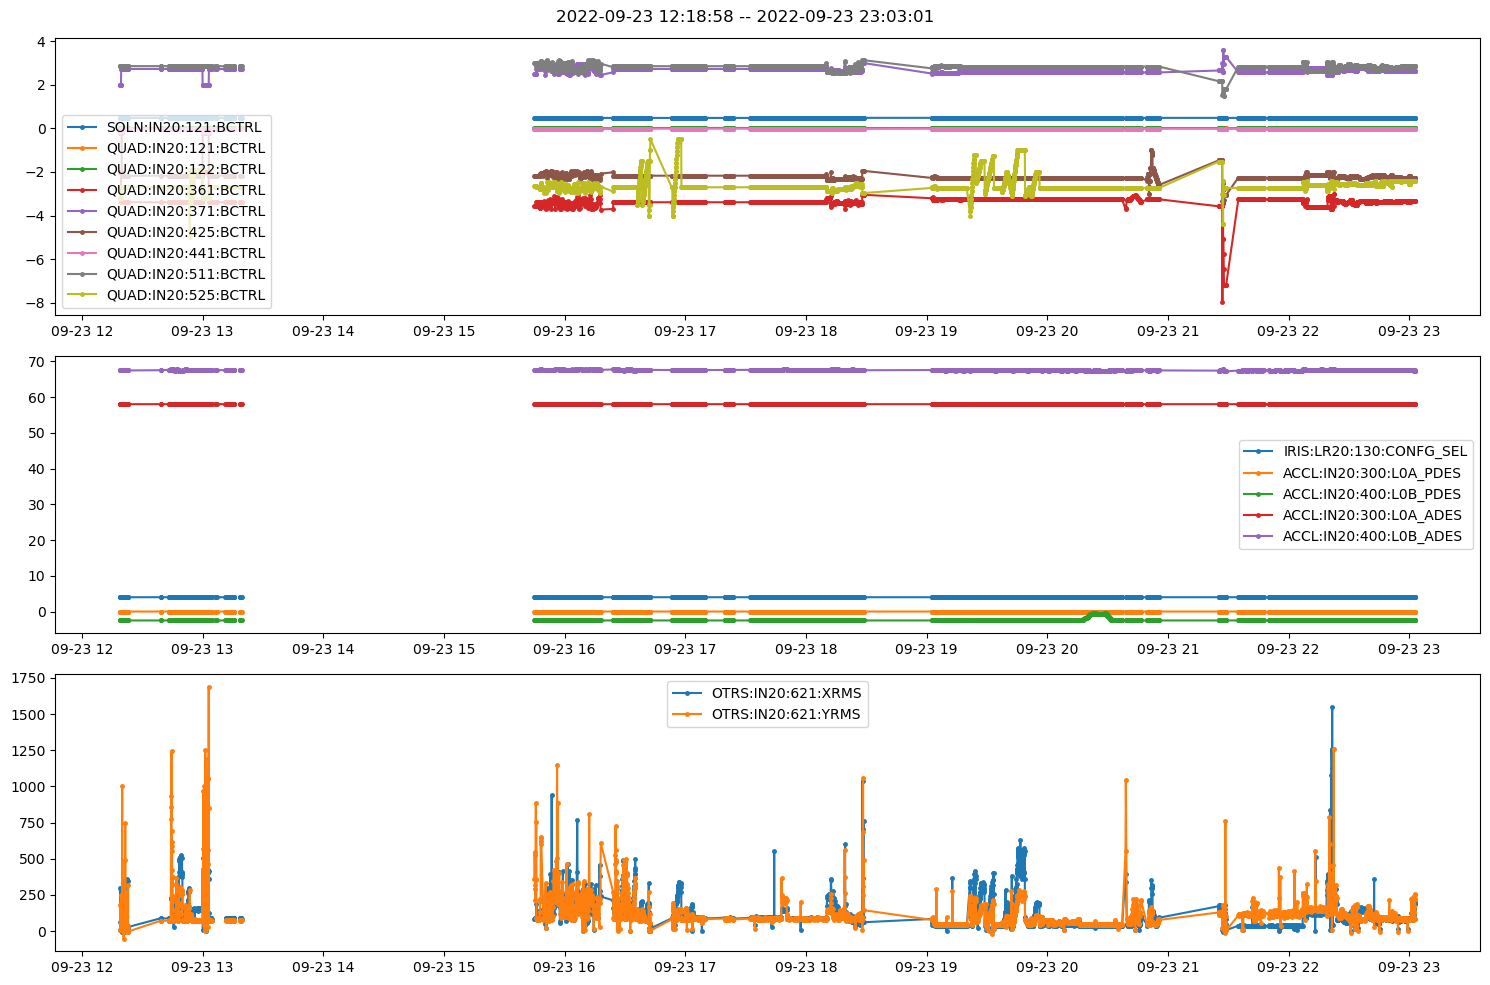

In [97]:
axes = ['magnets', 'outputs', 'others']

def plot_series(time_series_subset):

    fig, ax = plt.subplots(len(axes),figsize=(15,10))
    ax = ax.ravel()

    for col_no, col in enumerate(time_series_subset.columns[1:]):
        if 'QUAD' in col or 'SOLN' in col:
            ax[0].plot(time_series_subset['timestamp'], time_series_subset[col], '.-',markersize=5, label=col)
        elif 'OTRS' in col:
            ax[2].plot(time_series_subset['timestamp'], time_series_subset[col], '.-',markersize=5, label=col)
        else:
            ax[1].plot(time_series_subset['timestamp'], time_series_subset[col], '.-',markersize=5, label=col)
        # ax[i].set_ylabel(col)

    ax[0].legend()
    ax[1].legend()
    ax[2].legend()
    
    start_time = str(time_series_subset['timestamp'].iloc[0])
    end_time = str(time_series_subset['timestamp'].iloc[-1])
    fig.suptitle(f'{start_time[:-6]} -- {end_time[:-6]}')
    fig.tight_layout()
    plt.show()

plot_series(time_series_subset)

In [77]:
time_series_subset.to_pickle(f'data/relevant_{start_time}__{end_time}.pkl')

## Create Time Chunks
We can see here that there are some gaps in the data where different runs were executed. In order to visualise these better we want to break up the larger dataframe into smaller 'shunks' of each run.

In [88]:
def chunk_dataset(time_series_subset, time_gap='20 minutes'):
    gaps = time_series_subset['timestamp'].diff() > pd.to_timedelta(time_gap)
    chunk_indices = np.where(gaps == True)[0]

    dfs = []
    start_index = 0
    for chunk_idx in chunk_indices:
        print(start_index, chunk_idx)
        df = time_series_subset[start_index:chunk_idx]
        dfs.append(df)
        start_index = chunk_idx

    # then add the last one with the last chunk of data
    dfs.append(time_series_subset[start_index:])
    print(f'Found {len(dfs)} dataframes')
    return dfs

In [89]:
dfs = chunk_dataset(time_series_subset, time_gap='20 minutes')
# do a final check to make sure the length of all the chunks add up to the total number of points
np.sum(np.array([len(df) for df in dfs]))

0 332
332 1536
1536 2766
Found 4 dataframes


3665

In [80]:
dfs[0].head(1)

,timestamp,IRIS:LR20:130:CONFG_SEL,SOLN:IN20:121:BCTRL,QUAD:IN20:121:BCTRL,QUAD:IN20:122:BCTRL,ACCL:IN20:300:L0A_PDES,ACCL:IN20:400:L0B_PDES,ACCL:IN20:300:L0A_ADES,ACCL:IN20:400:L0B_ADES,QUAD:IN20:361:BCTRL,QUAD:IN20:371:BCTRL,QUAD:IN20:425:BCTRL,QUAD:IN20:441:BCTRL,QUAD:IN20:511:BCTRL,QUAD:IN20:525:BCTRL,OTRS:IN20:621:XRMS,OTRS:IN20:621:YRMS
0,2022-09-23 12:18:58-07:00,4.0,0.476,-0.001499,-0.000687,0.0,-2.5,58.0,67.640429,-2.000592,2.000592,-0.202176,-0.179388,2.852172,-3.2184,299.506088,178.293729


In [81]:
dfs[0].tail(2)

,timestamp,IRIS:LR20:130:CONFG_SEL,SOLN:IN20:121:BCTRL,QUAD:IN20:121:BCTRL,QUAD:IN20:122:BCTRL,ACCL:IN20:300:L0A_PDES,ACCL:IN20:400:L0B_PDES,ACCL:IN20:300:L0A_ADES,ACCL:IN20:400:L0B_ADES,QUAD:IN20:361:BCTRL,QUAD:IN20:371:BCTRL,QUAD:IN20:425:BCTRL,QUAD:IN20:441:BCTRL,QUAD:IN20:511:BCTRL,QUAD:IN20:525:BCTRL,OTRS:IN20:621:XRMS,OTRS:IN20:621:YRMS
330,2022-09-23 13:19:17-07:00,4.0,0.476,0.0144,0.011785,0.0,-2.5,58.0,67.495121,-3.391883,2.722325,-2.174307,-0.015611,2.848652,-2.70463,91.35155,72.469554
331,2022-09-23 13:19:24-07:00,4.0,0.476,0.0144,0.011785,0.0,-2.5,58.0,67.507197,-3.391883,2.722325,-2.174307,-0.015611,2.848652,-2.70463,87.06817,74.548314


In [82]:
dfs[1].head(1)

,timestamp,IRIS:LR20:130:CONFG_SEL,SOLN:IN20:121:BCTRL,QUAD:IN20:121:BCTRL,QUAD:IN20:122:BCTRL,ACCL:IN20:300:L0A_PDES,ACCL:IN20:400:L0B_PDES,ACCL:IN20:300:L0A_ADES,ACCL:IN20:400:L0B_ADES,QUAD:IN20:361:BCTRL,QUAD:IN20:371:BCTRL,QUAD:IN20:425:BCTRL,QUAD:IN20:441:BCTRL,QUAD:IN20:511:BCTRL,QUAD:IN20:525:BCTRL,OTRS:IN20:621:XRMS,OTRS:IN20:621:YRMS
332,2022-09-23 15:43:15-07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


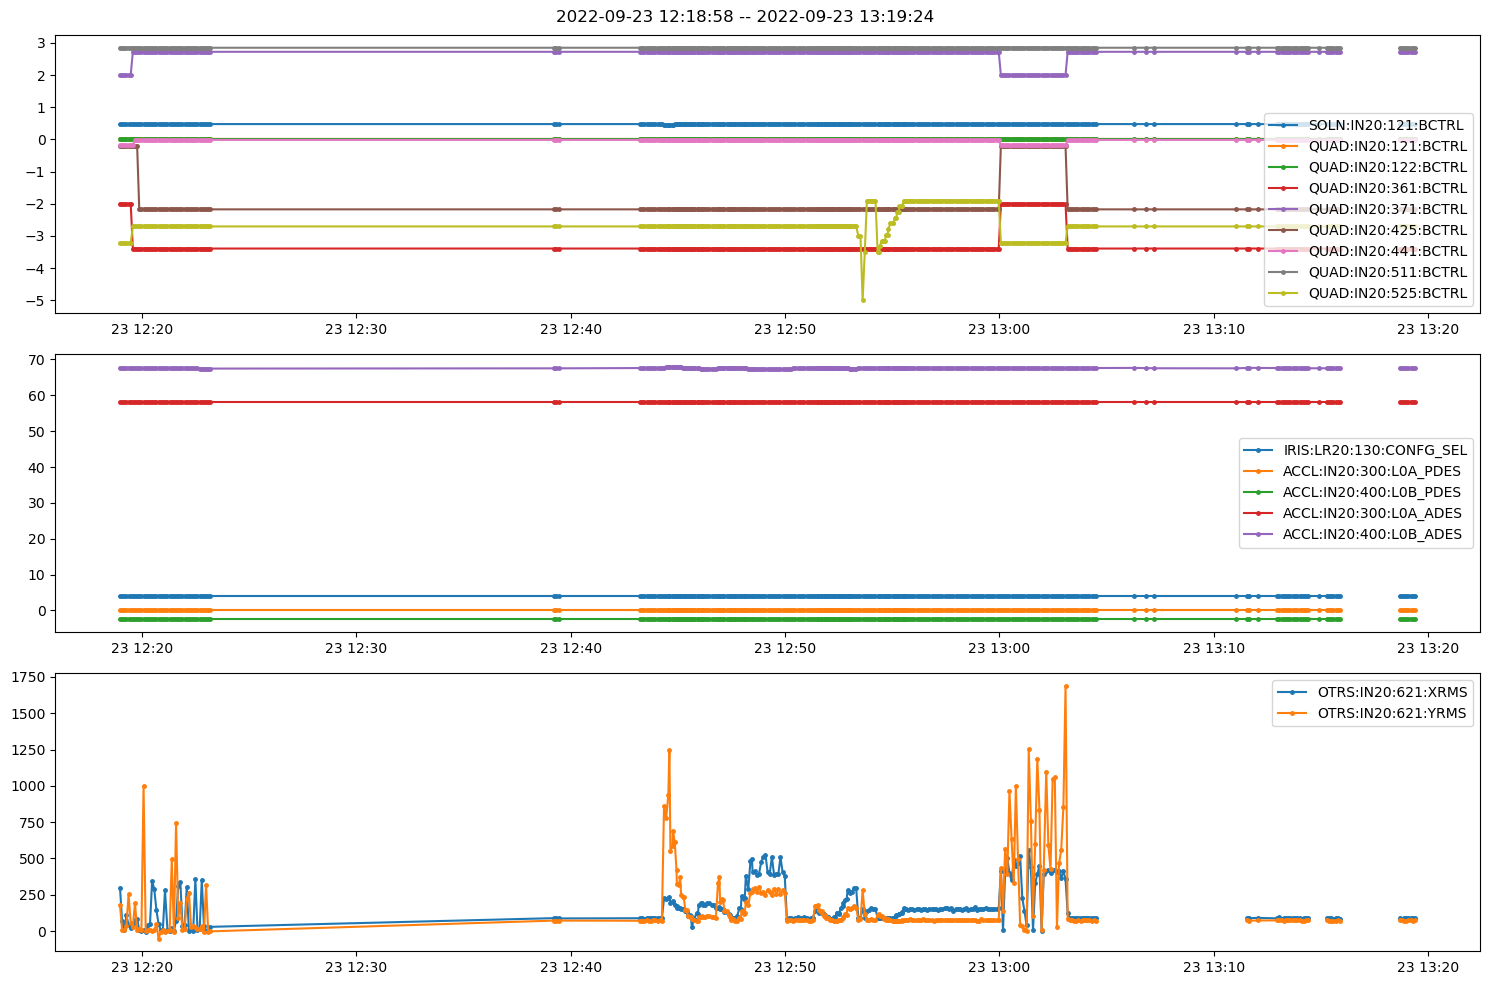

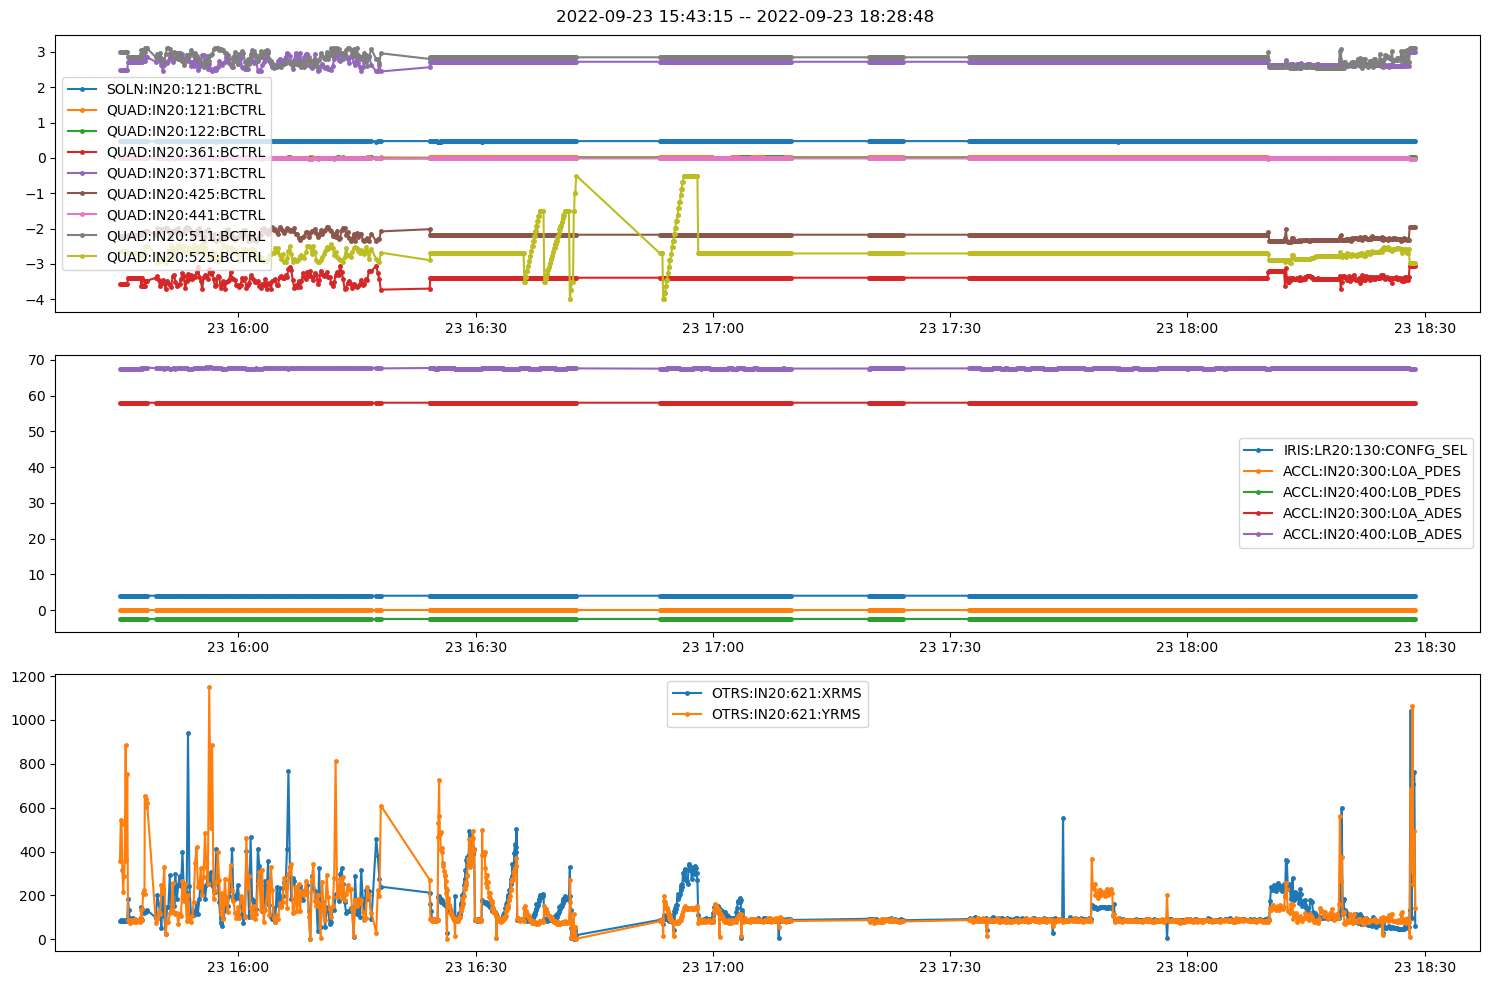

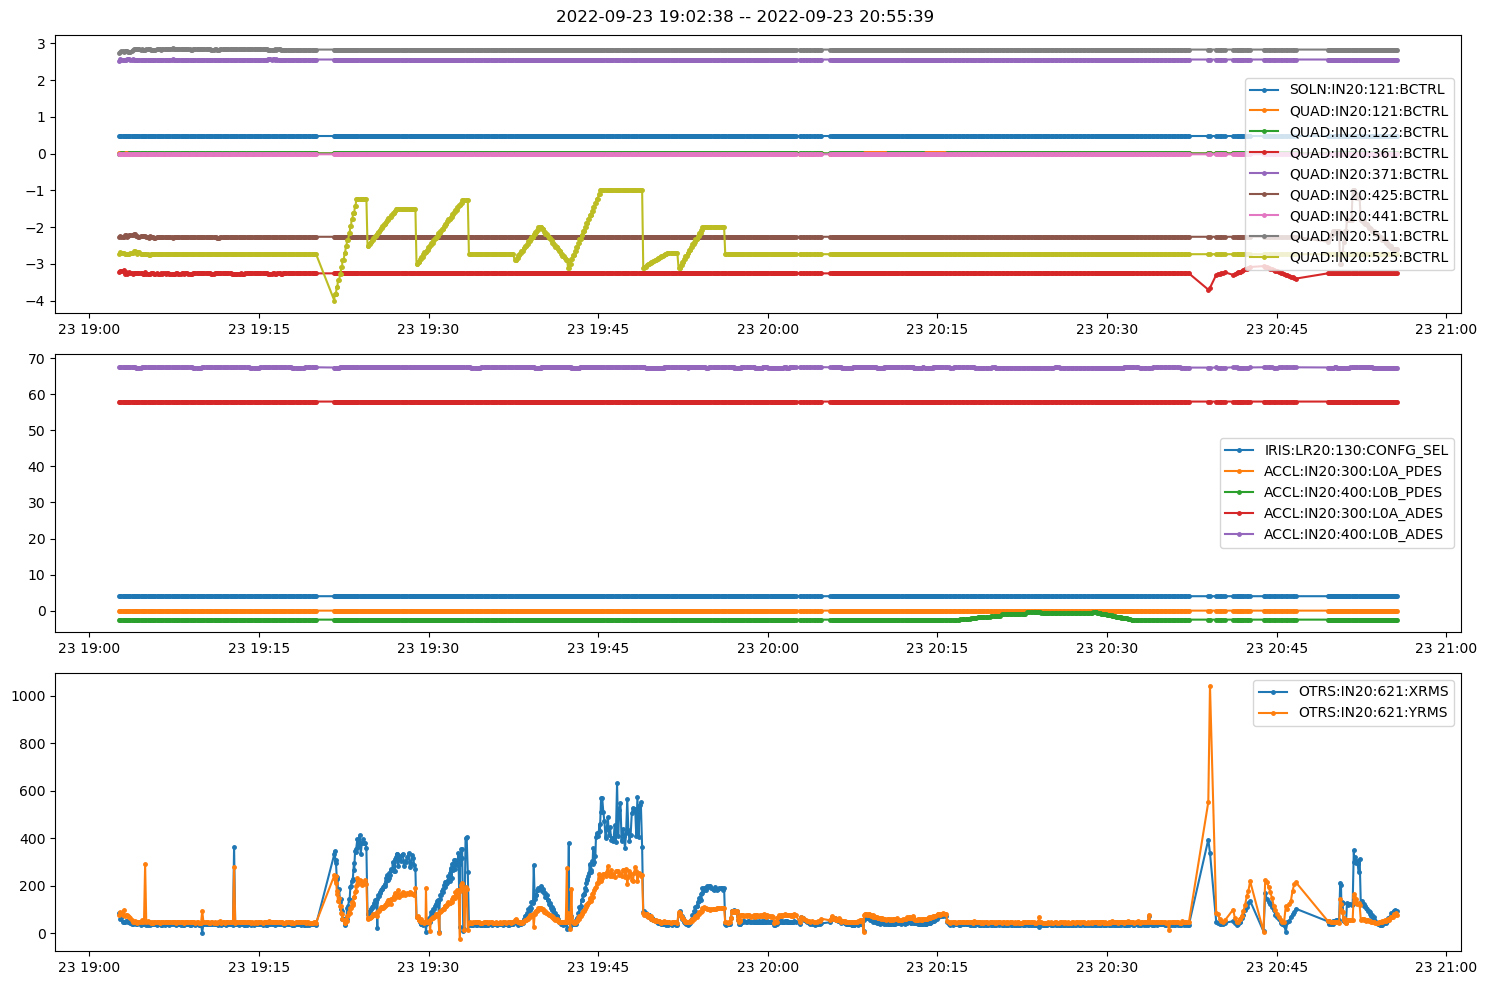

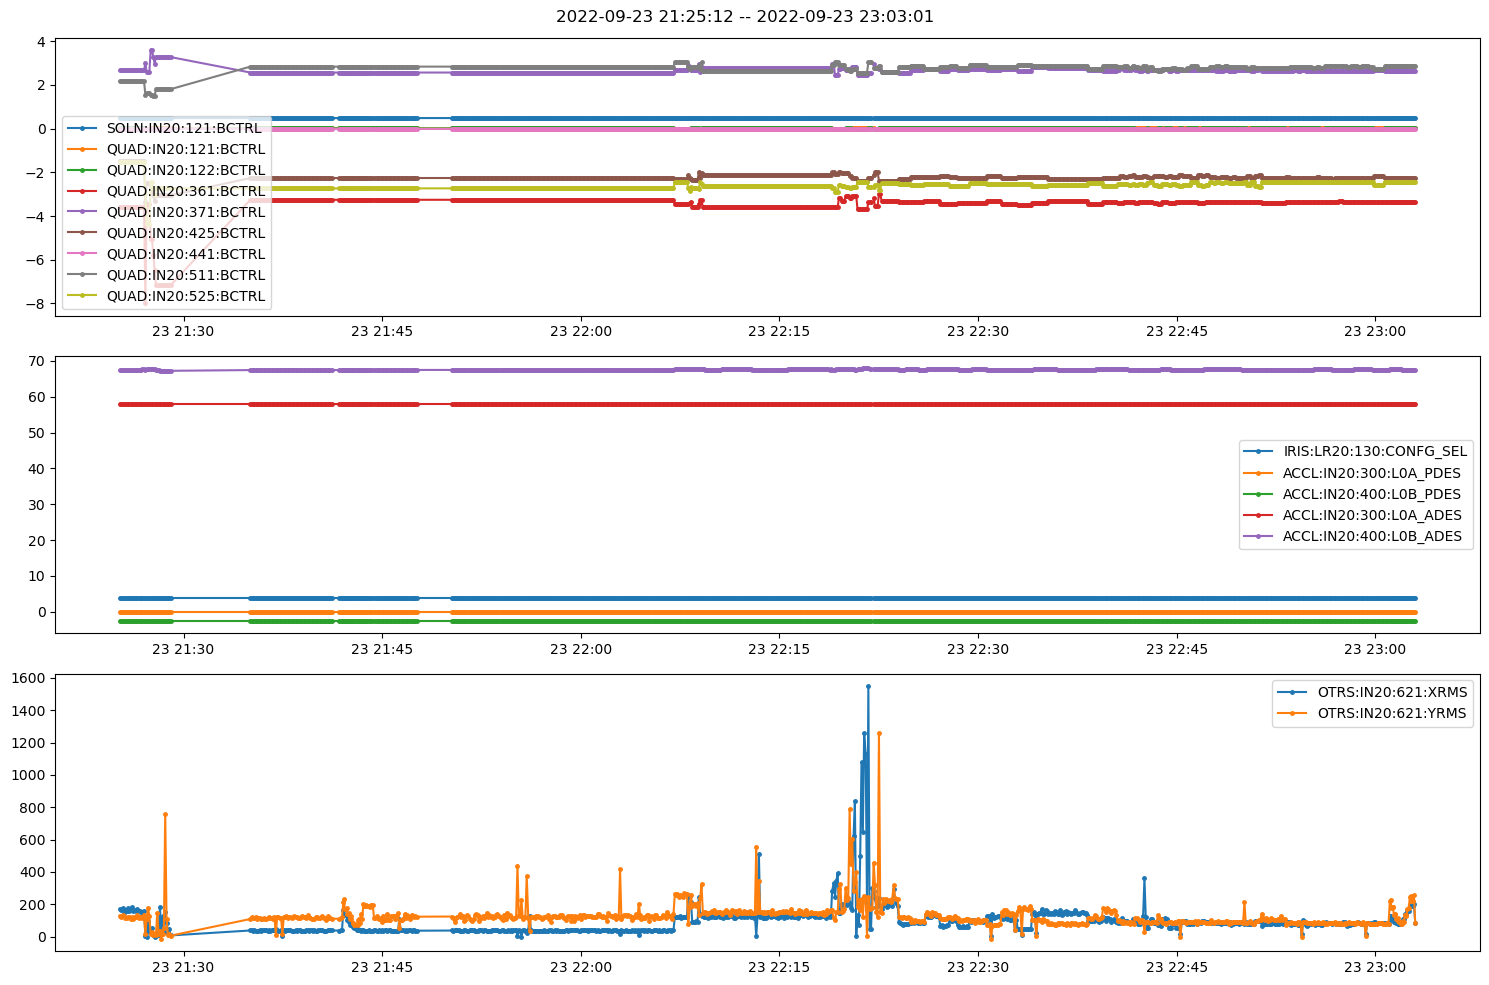

In [98]:
for i, df in enumerate(dfs):
    plot_series(df)

In [165]:
# finally, save each of the dataframes to be loaded later
for df in dfs:
    start_time = str(df['timestamp'].iloc[0]).replace(' ', '_')
    end_time = str(df['timestamp'].iloc[-1]).replace(' ', '_')
    # filename = f'{start_time}__{end_time}'
    df.to_pickle(f'data/{start_time}__{end_time}.pkl')